# Brain Age Prediction Lasso

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:

from sklearn.neighbors import KNeighborsRegressor
from base_regressor import BaseRegressor
from Plotter import Plotter

from skopt.space import Real, Categorical, Integer

class KNNRegressor(BaseRegressor):
   def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="KNN"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
         
        self.model_ml= KNeighborsRegressor
        if params is None:
            self.params = {
                'n_neighbors': 5,  # Número de vecinos
                'weights': 'uniform',  # Pesos uniformes para todos los vecinos
                'p': 1
            }
        if params_space is None:
            self.params_space = {
                'n_neighbors': Integer(1, 50),        
                'weights': Categorical(['uniform', 'distance']),
                'p': Integer(1, 2)
            }



c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = KNNRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'teal'
nameset = 'KNN'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}BrainAge_MachineLearning_MultiplesModels/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

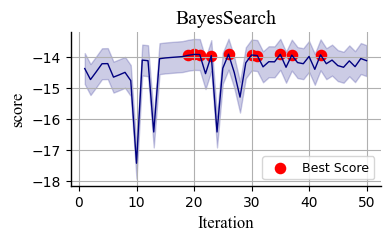

Top 1: Iteration 26, Score -13.90410818035348
Top 2: Iteration 35, Score -13.908885494987468
Top 3: Iteration 20, Score -13.910936457998265
Top 4: Iteration 21, Score -13.916087499987208
Top 5: Iteration 42, Score -13.924144493572948
Top 6: Iteration 30, Score -13.929482323232325
Top 7: Iteration 37, Score -13.933722354338391
Top 8: Iteration 19, Score -13.938165416349179
Top 9: Iteration 31, Score -13.947347017681945
Top 10: Iteration 23, Score -13.94962229328157


In [8]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [9]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'n_neighbors': 14, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 14, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 12, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 16, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 15, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 17, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}]

In [10]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

In [14]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [15]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [6]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [16]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar las métricas de cada fold
mae_list = []
mae_corrected_list = []
r2_list = []
r2_corrected_list = []

# Iterar sobre cada DataFrame en la lista
for df in results_per_fold_CN_test:
    # Calcular MAE y R2 para y_pred
    mae = mean_absolute_error(df['y_labels'], df['y_pred'])
    r2 = r2_score(df['y_labels'], df['y_pred'])
    
    # Calcular MAE y R2 para y_pred_corrected
    mae_corrected = mean_absolute_error(df['y_labels'], df['y_pred_corrected'])
    r2_corrected = r2_score(df['y_labels'], df['y_pred_corrected'])
    
    # Agregar los valores a las listas
    mae_list.append(mae)
    mae_corrected_list.append(mae_corrected)
    r2_list.append(r2)
    r2_corrected_list.append(r2_corrected)

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame({
    'Fold': range(1, len(results_per_fold_CN_test) + 1),
    'MAE': mae_list,
    'MAE_corrected': mae_corrected_list,
    'R2': r2_list,
    'R2_corrected': r2_corrected_list
})

# Mostrar las primeras filas del DataFrame de métricas
print(metrics_df.head())


   Fold        MAE  MAE_corrected        R2  R2_corrected
0     1  13.463749       7.935316  0.349420      0.785163
1     2  13.528419       8.120899  0.324491      0.773736
2     3  16.006803       8.987131  0.162246      0.751387
3     4  14.908054       8.583514  0.216401      0.735937
4     5  14.682269       8.431133  0.174234      0.733329


In [17]:
output_file = "results/metrics_results_per_fold.xlsx"
metrics_df.to_excel(output_file, index=False, engine='openpyxl')

In [18]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')


In [19]:
df_CN_results.to_excel('results/df_CN_results_training.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     5607.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:06:48   Log-Likelihood:                -4853.3
No. Observations:                1323   AIC:                             9711.
Df Residuals:                    1321   BIC:                             9721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5018      0.659      3.798      0.0

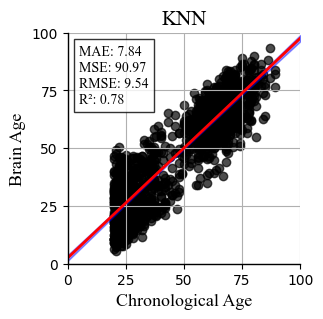

Error medio absoluto: 7.8434501214508705
Error cuadrático medio: 90.97160160139458
Raíz del error cuadrático medio: 9.537903417491425
Coeficiente de determinación (R²): 0.7845201506981732


In [7]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_set
)

In [8]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [9]:
shap_summary_sorted_CN

[('IAF_OCC_right', 1263.9899862342309),
 ('IAF_OCC_left', 1193.0948790795828),
 ('Low_subj_spec_EPP_OCC_right', 683.3327127587374),
 ('Low_subj_spec_RPD_CING_right', 655.270030848609),
 ('High_subj_spec_RPD_CING_right', 645.3555987950963),
 ('Low_subj_spec_EPP_PARIET_right', 640.9101753153349),
 ('Alpha2_canon_RPD_CING_right', 639.0672500497499),
 ('High_subj_spec_EPP_CING_right', 638.1724893635451),
 ('TF_MFG_right', 570.1157590142594),
 ('Low_subj_spec_EPP_PARIET_left', 567.8439851861609),
 ('Low_subj_spec_RPD_HPC_left', 552.1358801190581),
 ('Low_subj_spec_RPD_CING_left', 544.4347618966062),
 ('Alpha2_canon_RPD_CING_left', 542.9326310017768),
 ('High_subj_spec_EPP_CING_left', 535.684158253568),
 ('IAF_INS_left', 530.0655176344474),
 ('High_subj_spec_RPD_CING_left', 525.2697829189419),
 ('IAF_HPC_left', 523.8457397303234),
 ('Alpha2_canon_EPP_HPC_left', 489.20738675614007),
 ('High_subj_spec_EPP_HPC_left', 484.5002164193485),
 ('Alpha2_canon_RPD_HPC_left', 483.2789062441523),
 ('Alph

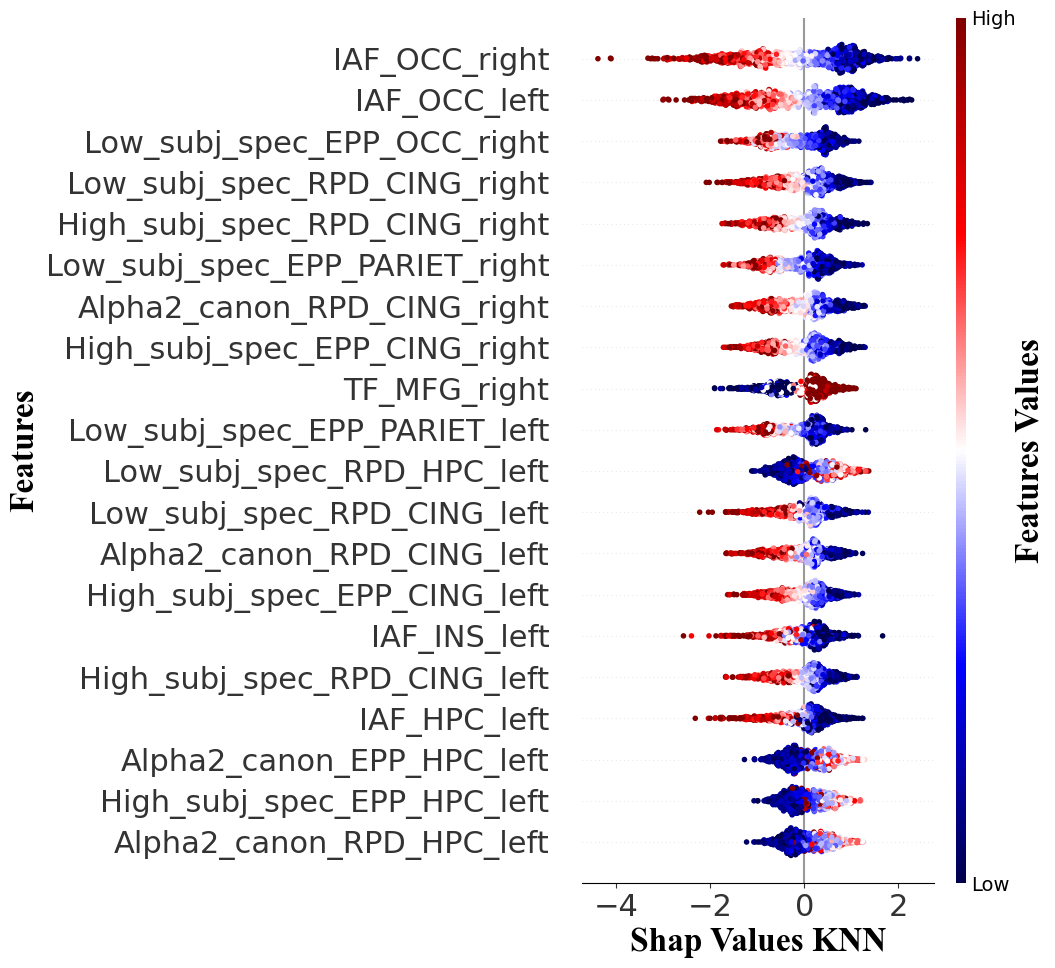

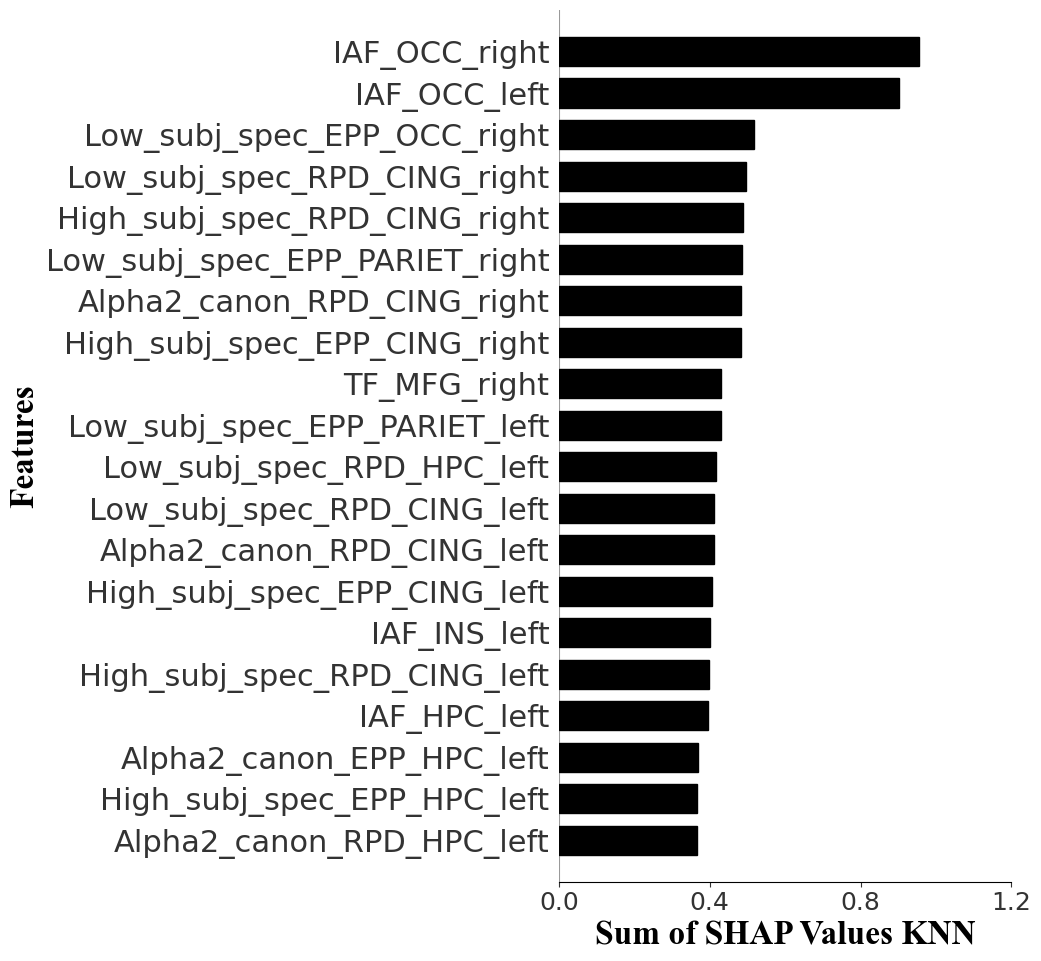

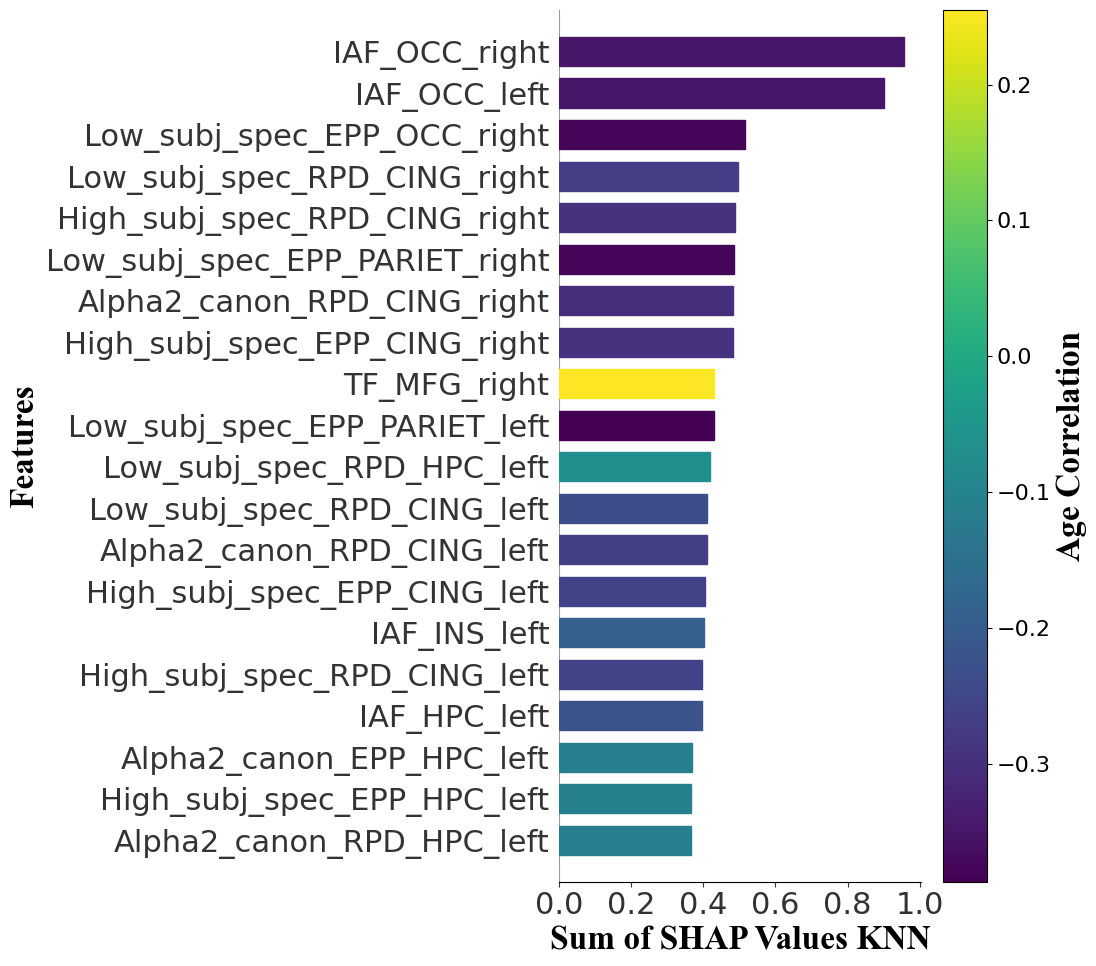

In [10]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [11]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

CING_right: 1.000000
HPC_left: 0.982584
CING_left: 0.833372
OCC_right: 0.755401
OCC_left: 0.462823
PARIET_right: 0.248620
MFG_right: 0.221158
PARIET_left: 0.220277
INS_left: 0.205622


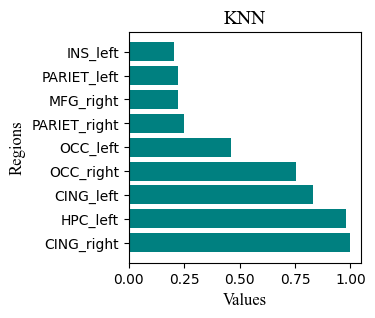

In [12]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


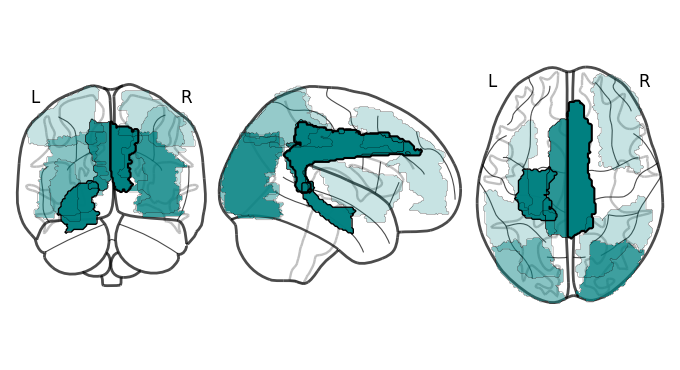

In [13]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

# Classification

In [14]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            #'gamma': Real(0.0, 10.0),
            #'min_child_weight': Integer(1, 10),
            #'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 2000),  # Número de árboles a probar
            #'n_estimators': [100]
        }

In [15]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [20]:
df_results_combined =df_CN_results

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)




C:\Users\felip\AppData\Local\Temp\ipykernel_23520\2760676698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [22]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [23]:
best_params_cls = opt_model_cls.best_params_

In [24]:
best_params_cls

OrderedDict([('colsample_bytree', 0.6593094087476927),
             ('eval_metric', 'aucpr'),
             ('learning_rate', 0.01),
             ('max_depth', 10),
             ('n_estimators', 744),
             ('objective', 'binary:logistic'),
             ('reg_alpha', 1.0),
             ('reg_lambda', 1.0),
             ('subsample', 0.8390639070784596)])

In [25]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:196: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [26]:
# Lista de métricas por fold
metrics_per_fold_cls = [
    model_cls.clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)
        

In [27]:
metrics_

{'AUC': [0.69648033126294,
  0.7503113325031133,
  0.6781524926686218,
  0.716084656084656,
  0.7322751322751323,
  0.7528019925280198,
  0.6999378109452736,
  0.765455304928989,
  0.7258166491043203,
  0.6581860762188632,
  0.6811309030654515,
  0.8037500000000001,
  0.6612500000000001,
  0.772966155139794,
  0.7523148148148148,
  0.7020833333333334,
  0.7039800995024876,
  0.7780887230514095,
  0.7388888888888889,
  0.7480505795574289,
  0.6653091060985797,
  0.8119304059652028,
  0.7443443653121072,
  0.7662802950474183,
  0.6709060332142107,
  0.6835986594051109,
  0.6663557213930348,
  0.7012474012474013,
  0.7727079796264856,
  0.7695707070707071,
  0.6595898922949461,
  0.7520712510356254,
  0.775425487754255,
  0.7457466918714554,
  0.7207491582491582,
  0.6801176965111391,
  0.6559251559251559,
  0.7224523612261805,
  0.7030691612360732,
  0.7800886824324325,
  0.7215042372881356,
  0.6875,
  0.7749585749792874,
  0.6809665744091973,
  0.7663865546218487,
  0.7484452736318408,

In [28]:
with open("results_model/metrics_classification.pkl", "wb") as f:
    pickle.dump(metrics_, f)

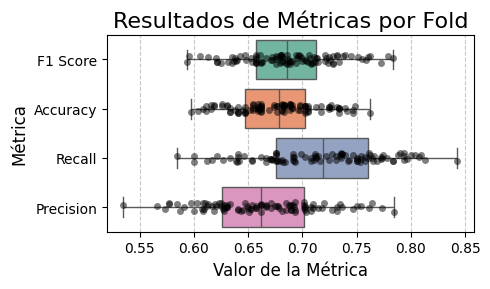

In [29]:
# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

Plotters.plot_metrics_clf(metrics_df)

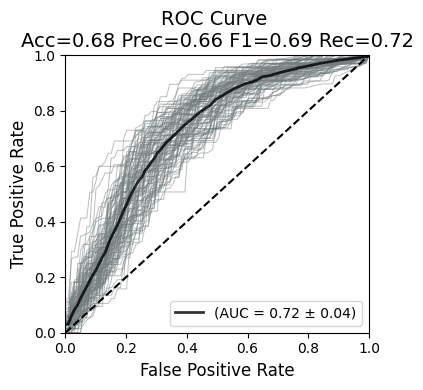

In [30]:
Plotters.graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.0)


In [31]:
import numpy as np
f_scores, f_score_std, classes = model_cls.calculate_f_scores(metrics_, results_model, threshold=0.0)
print("Promedio de F-scores:", f_scores)
print("Desviación estándar de F-scores:", f_score_std)
print("Características:", classes)

Promedio de F-scores: [568.03, 4157.17, 1896.92, 2466.62]
Desviación estándar de F-scores: [34.92147047304853, 173.4527056577671, 93.44299652729464, 92.42226787955377]
Características: ['Sex', 'Educ', 'MMSE', 'GINI']


In [32]:
data_to_save = {
    "f_scores": f_scores,
    "f_score_std": f_score_std,
    "classes": classes
}

# Guardar en un archivo pickle
with open("results_model/f_scores_data_classification.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

In [33]:
f_scores

[568.03, 4157.17, 1896.92, 2466.62]

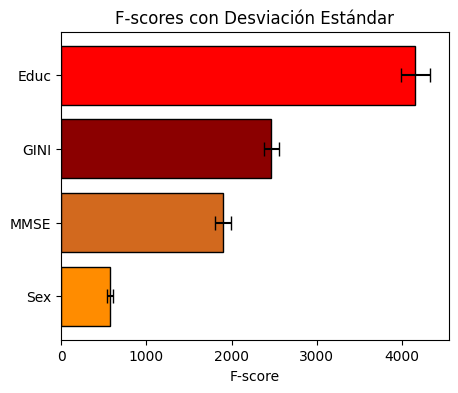

In [34]:
Plotters.plot_f_scores(f_scores, f_score_std, classes, colors=['darkorange', 'red', 'chocolate', 'darkred'],x_size=5)


In [35]:
results_model['model'][0].get_booster().get_score()

{'Sex': 559.0, 'Educ': 4317.0, 'MMSE': 1911.0, 'GINI': 2620.0}

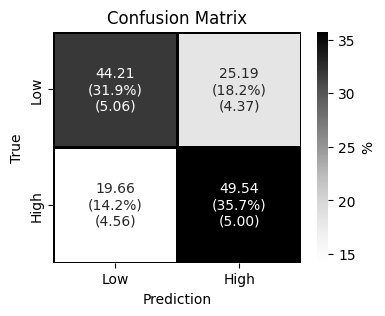

In [36]:
Plotters.C_Matrix(metrics_, threshold=0.0)

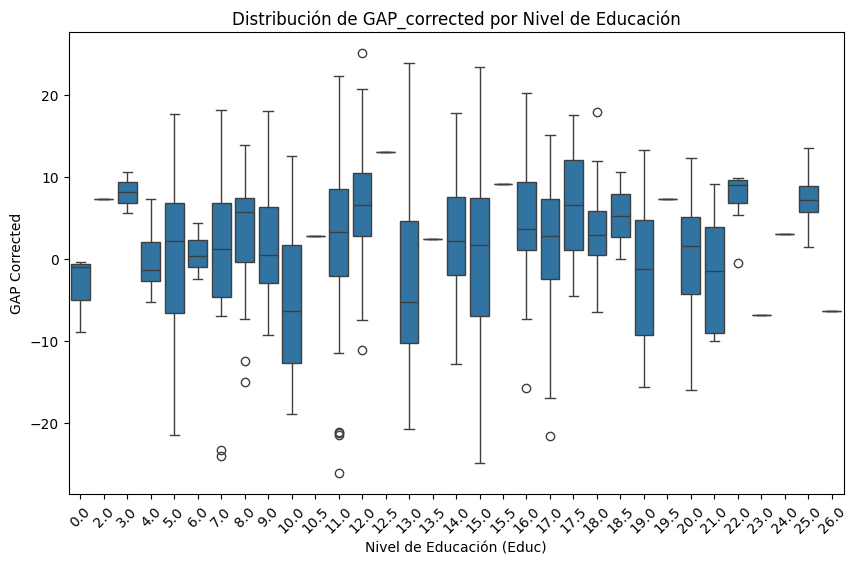

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Educ', y='GAP_corrected', data=df_results_combined)

# Personalizar el gráfico
plt.title('Distribución de GAP_corrected por Nivel de Educación')
plt.xlabel('Nivel de Educación (Educ)')
plt.ylabel('GAP Corrected')
plt.xticks(rotation=45)  # Si es necesario, rota las etiquetas del eje X para mayor claridad

# Mostrar el gráfico
plt.show()
